<a href="https://colab.research.google.com/github/Dazzlingkavya/HIF/blob/main/okcupid_hif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
okcupid= pd.read_csv('profiles_revised.csv')

In [ ]:
okcupid.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [ ]:
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  offspring    24385 non-null  object 
 11  orientation  59946 non-null  object 
 12  pets         40025 non-null  object 
 13  religion     39720 non-null  object 
 14  sex          59946 non-null  object 
 15  sign         48890 non-null  object 
 16  smokes       54434 non-null  object 
 17  speaks       59896 non-null  object 
 18  status       59946 non-null  object 
dtypes: f

In [ ]:
okcupid.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.335402,68.295281,20033.222534
std,9.490009,3.994803,97346.192104
min,17.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,111.000000,95.000000,1000000.000000


In [ ]:
okcupid.religion.unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [ ]:
okcupid.job.unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [ ]:
stem_jobs = ['engineering', 'science', 'technology', 'mathematics', 'programmer', 'software',
             'developer', 'scientist', 'research', 'data']

In [ ]:
# Function to classify jobs as 'stem' or 'other'
def classify_job(job):
    if pd.isna(job):
        return 'other'
    for stem_job in stem_jobs:
        if stem_job in job.lower():
            return 'stem'
    return 'other'

In [ ]:
# Create the 'Class' column
okcupid['Class'] = okcupid['job'].apply(classify_job)

In [ ]:
okcupid['Class'].unique()

array(['other', 'stem'], dtype=object)

In [ ]:
# Simplify the religion categories to match the provided image
simplified_religions = {
    'christianity': 'christianity',
    'catholicism': 'catholicism',
    'buddhism': 'buddhism',
    'judaism': 'judaism',
    'islam': 'islam',
    'agnosticism': 'agnosticism',
    'atheism': 'atheism',
    'hinduism': 'hinduism',
    'other': 'other',
    'missing': 'missing'
}

In [ ]:
def simplify_religion(religion):
    if pd.isna(religion):
        return 'missing'
    religion = religion.lower()
    for key in simplified_religions:
        if key in religion:
            return simplified_religions[key]
    return 'other'

In [ ]:
okcupid['Religion'] = okcupid['religion'].apply(simplify_religion)

In [ ]:
okcupid['Religion'].unique()

array(['agnosticism', 'missing', 'atheism', 'christianity', 'other',
       'catholicism', 'buddhism', 'judaism', 'hinduism', 'islam'],
      dtype=object)

In [ ]:
# Create a count table and calculate the ratio of 'stem' to total
count_table = okcupid.groupby(['Religion', 'Class']).size().unstack(fill_value=0)
count_table['ratio'] = count_table['stem'] / (count_table['stem'] + count_table['other'])


In [ ]:
# Reorder the religions by ratio
ordered_religions = count_table.sort_values(by='ratio', ascending=True).index

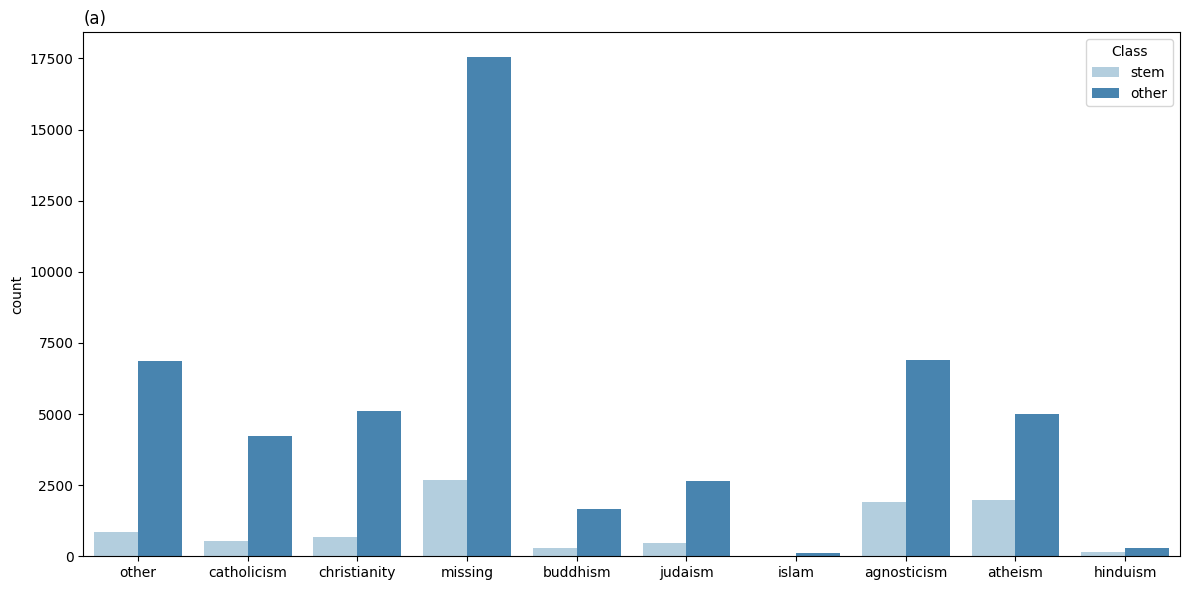

In [ ]:
# Plot with ordered religions and stem first
plt.figure(figsize=(12, 6))
sns.countplot(data=okcupid, x='Religion', hue='Class', hue_order=['stem', 'other'], order=ordered_religions, palette='Blues')
plt.xlabel('')
plt.ylabel('count')
plt.legend(title='Class', loc='upper right')
plt.title('(a)', loc='left')
plt.tight_layout()

# Show the plot
plt.show()

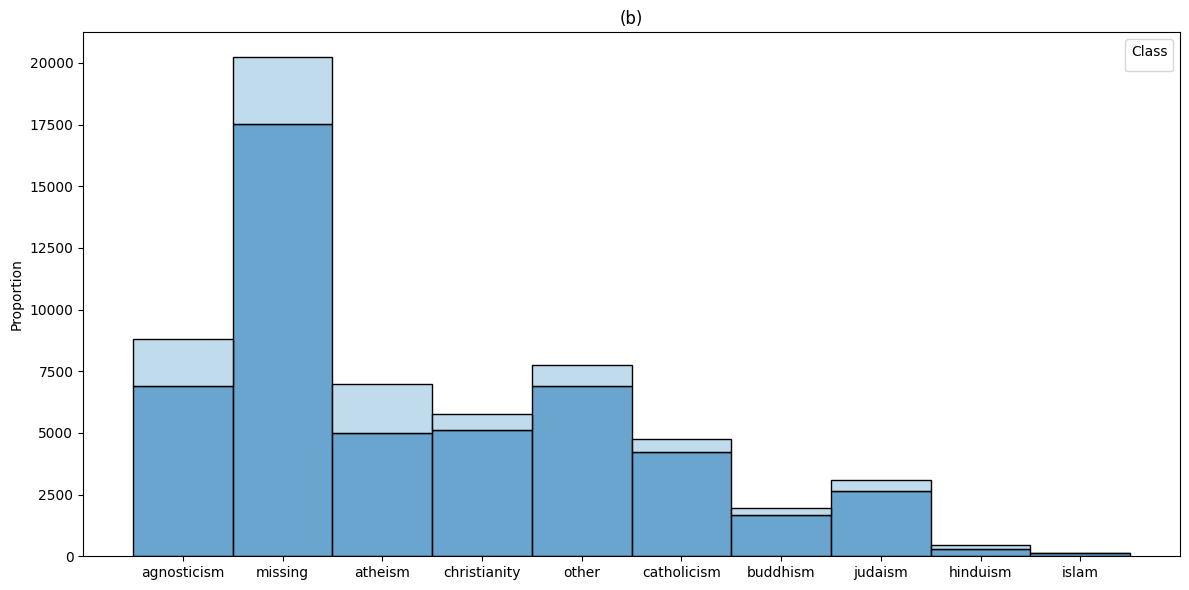

In [ ]:
# Stacked bar chart showing proportions
plt.figure(figsize=(12, 6))
sns.histplot(data=okcupid, x='Religion', hue='Class', hue_order=['stem', 'other'],palette='Blues',multiple='stack')
plt.title('(b)')
plt.xlabel('')
plt.ylabel('Proportion')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

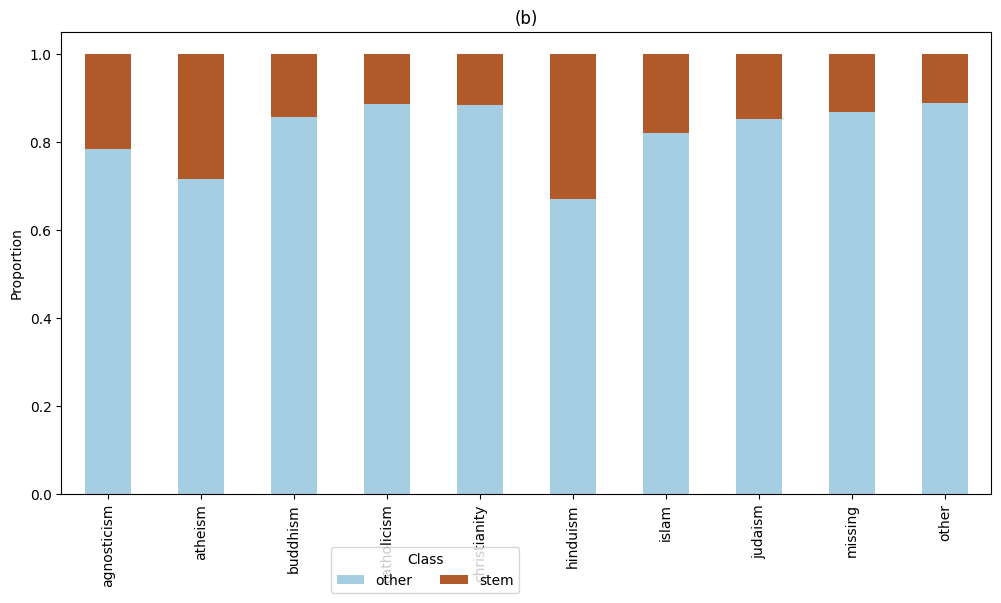

In [ ]:
 # (b) Proportion plot
plt.figure(figsize=(12, 6))
prop = okcupid.groupby(['Religion', 'Class']).size().unstack().fillna(0)
prop = prop.div(prop.sum(axis=1), axis=0)
prop.plot(kind='bar', stacked=True, colormap='Paired', ax=plt.gca())
plt.title('(b)')
plt.xlabel('')
plt.ylabel('Proportion')
plt.legend(title='Class', loc='upper right', bbox_to_anchor=(0.5, -0.1), ncol=2)

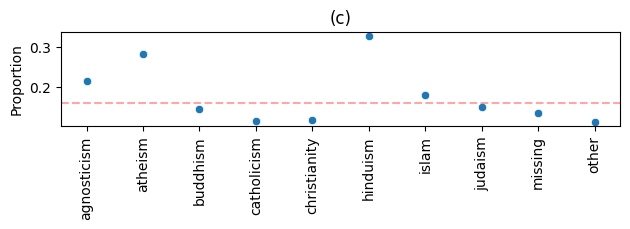

In [ ]:
 # (c) Confidence intervals
plt.subplot(3, 1, 3)
stem_rate = np.mean(okcupid['Class'] == 'stem')
religion_rates = okcupid.groupby('Religion').apply(lambda x: pd.Series({
        'Proportion': np.mean(x['Class'] == 'stem'),
        'Lower': np.nan,
        'Upper': np.nan
    })).reset_index()
religion_rates['Lower'] = religion_rates['Proportion'] - 1.96 * np.sqrt((religion_rates['Proportion'] * (1 - religion_rates['Proportion'])) / len(okcupid))
religion_rates['Upper'] = religion_rates['Proportion'] + 1.96 * np.sqrt((religion_rates['Proportion'] * (1 - religion_rates['Proportion'])) / len(okcupid))

sns.scatterplot(data=religion_rates, x='Religion', y='Proportion')
plt.axhline(y=stem_rate, color='red', linestyle='--', alpha=0.35)
plt.title('(c)')
plt.xlabel('')
plt.ylabel('Proportion')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

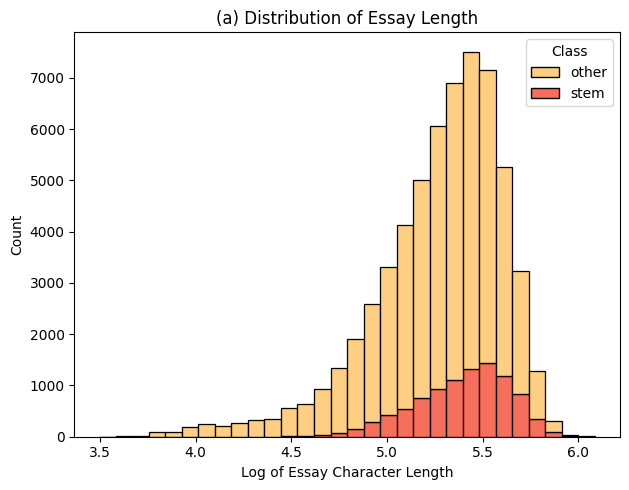

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_essay_length_distribution(okc_train):
    # Concatenate text fields into a single column
    okc_train['essay_length'] = okc_train['body_type'].fillna('') + " " + okc_train['diet'].fillna('') + " " + \
                               okc_train['drinks'].fillna('') + " " + okc_train['drugs'].fillna('') + " " + \
                               okc_train['education'].fillna('') + " " + okc_train['ethnicity'].fillna('') + " " + \
                               okc_train['job'].fillna('') + " " + okc_train['offspring'].fillna('') + " " + \
                               okc_train['orientation'].fillna('') + " " + okc_train['pets'].fillna('') + " " + \
                               okc_train['religion'].fillna('') + " " + okc_train['sign'].fillna('') + " " + \
                               okc_train['smokes'].fillna('') + " " + okc_train['speaks'].fillna('') + " " + \
                               okc_train['status'].fillna('') + " " + okc_train['sex'].fillna('')

    # Calculate character length and handle profiles without essay text
    okc_train['essay_length'] = okc_train['essay_length'].apply(lambda x: len(x) if x else 0)

    # Log transform the essay length, replace 0 with a small value for log transformation
    okc_train['log_essay_length'] = np.log1p(okc_train['essay_length'])

    plt.figure(figsize=(12, 5))

    # Plot the distribution of essay length
    plt.subplot(1, 2, 1)
    sns.histplot(data=okc_train, x='log_essay_length', hue='Class', multiple='stack', palette='YlOrRd', bins=30)
    plt.title('(a) Distribution of Essay Length')
    plt.xlabel('Log of Essay Character Length')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Example call to the function
plot_essay_length_distribution(okcupid)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert Class to numeric (0 and 1) if it's categorical
if okcupid['Class'].dtype == 'object':
    le = LabelEncoder()
    okcupid['Class'] = le.fit_transform(okcupid['Class'])

In [ ]:
# Check for missing values
print(okcupid[['Class', 'log_essay_length']].isnull().sum())


Class               0
log_essay_length    0
dtype: int64


In [ ]:
# Drop rows with missing values
okcupid = okcupid.dropna(subset=['Class', 'log_essay_length'])


In [ ]:
# Convert log_essay_length to numeric if necessary
okcupid['log_essay_length'] = pd.to_numeric(okcupid['log_essay_length'], errors='coerce')


In [ ]:
import numpy as np
from patsy import dmatrix

# Convert DataFrame columns to numpy arrays
X = dmatrix("bs(log_essay_length, df=5, include_intercept=False)", {"log_essay_length": np.asarray(okcupid['log_essay_length'])})
y = np.asarray(okcupid['Class'])


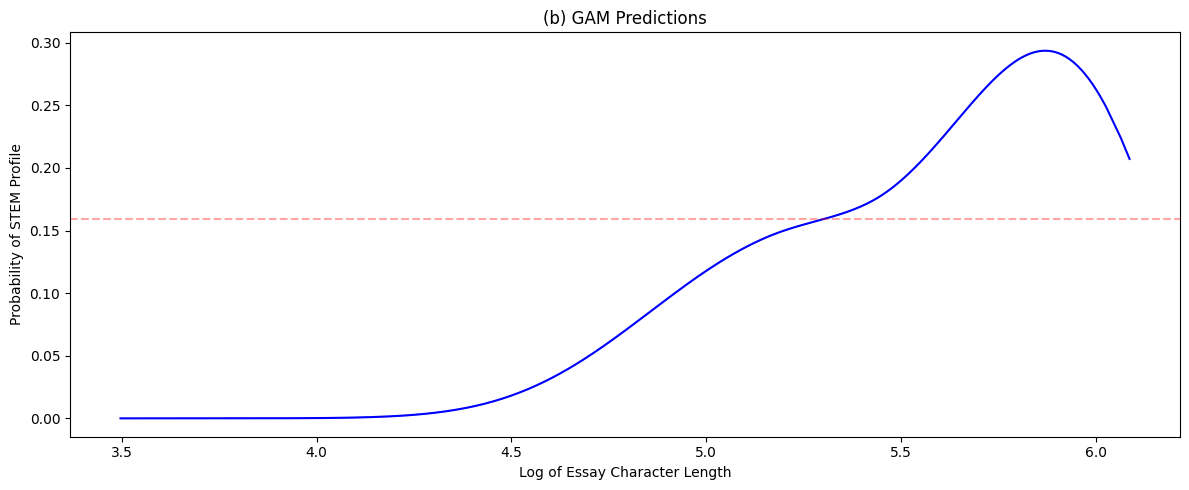

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.preprocessing import LabelEncoder

def plot_gam(okc_train):
    # Ensure 'Class' is numeric
    if okc_train['Class'].dtype == 'object':
        le = LabelEncoder()
        okc_train['Class'] = le.fit_transform(okc_train['Class'])

    # Ensure 'log_essay_length' is numeric
    okc_train['log_essay_length'] = np.log1p(okc_train['essay_length'])
    okc_train['log_essay_length'] = pd.to_numeric(okc_train['log_essay_length'], errors='coerce')

    # Drop rows with missing values
    okc_train = okc_train.dropna(subset=['Class', 'log_essay_length'])

    # Create spline basis functions
    X = dmatrix("bs(log_essay_length, df=5, include_intercept=False)", {"log_essay_length": np.asarray(okc_train['log_essay_length'])})
    y = np.asarray(okc_train['Class'])

    # Fit GAM model
    model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

    # Predict probabilities
    okc_train['predicted_prob'] = model.predict(X)

    plt.figure(figsize=(12, 5))

    # (b) GAM predictions
    plt.subplot(1, 1, 1)
    sns.lineplot(x=okc_train['log_essay_length'], y=okc_train['predicted_prob'], color='blue')
    plt.axhline(y=okc_train['Class'].mean(), color='red', linestyle='--', alpha=0.35)
    plt.title('(b) GAM Predictions')
    plt.xlabel('Log of Essay Character Length')
    plt.ylabel('Probability of STEM Profile')

    plt.tight_layout()
    plt.show()

# Example call to the function
plot_gam(okcupid)


In [ ]:
!pip install prince pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import prince


In [ ]:
# Mutate (Recode) the Data
okcupid['drugs'] = pd.Categorical(
    okcupid['drugs'].fillna('drugs_missing'),
    categories=["drugs_missing", "never", "sometimes", "often"],
    ordered=True
)

okcupid['drinks'] = pd.Categorical(
    okcupid['drinks'].fillna('drinks_missing'),
    categories=["drinks_missing", "not_at_all", "rarely", "socially", "often", "very_often", "desperately"],
    ordered=True
)


In [ ]:
# Create the contingency table
dd_tab = pd.crosstab(okcupid['drugs'], okcupid['drinks'])

# Modify the Labels
dd_tab.index = dd_tab.index.str.replace("drugs_missing", "missing")
dd_tab.columns = dd_tab.columns.str.replace("_", " ")
dd_tab.columns = dd_tab.columns.str.replace("drinks_missing", "missing")
dd_tab.columns = dd_tab.columns.str.replace("very often", "very often")
dd_tab.columns = dd_tab.columns.str.replace("desperately", "\ndesperately")


<Figure size 1200x800 with 0 Axes>

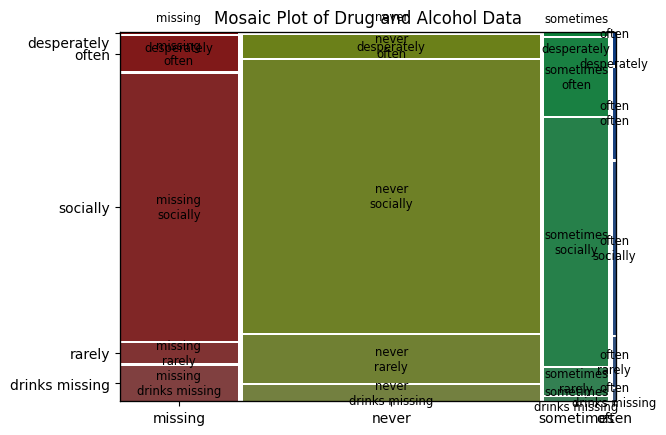

In [ ]:
# Mosaic Plot
plt.figure(figsize=(12, 8))
mosaic(dd_tab.stack(), title='Mosaic Plot of Drug and Alcohol Data', gap=0.01)
plt.show()
